In [1]:
from all_functions import *

# 6 Hour Test Campaign Analysis

Welcome to this notebook where you can find visualisations of the results for the 6-hour test campaign.

The test campaign is split into four sets:
1. **Unicast vs Multicast**: Self explanatory.
2. **Participant Measure**: Measuring performance while varying the number of participants.
3. **DDOS**: Measuring performance while under simulated distributed denial of service attack.
4. **Malicious Subscribers**: Measuring performance while varying number of malicious subscribers access the data.

## Set 1: Unicast vs Multicast

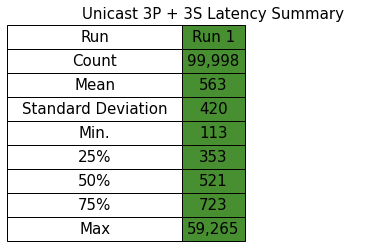

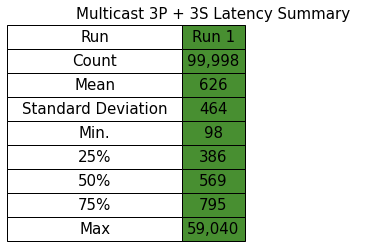

In [3]:
plot_lat_summary_table([file for file in get_files("data/v2/set_1") if 'average_latencies' in file])

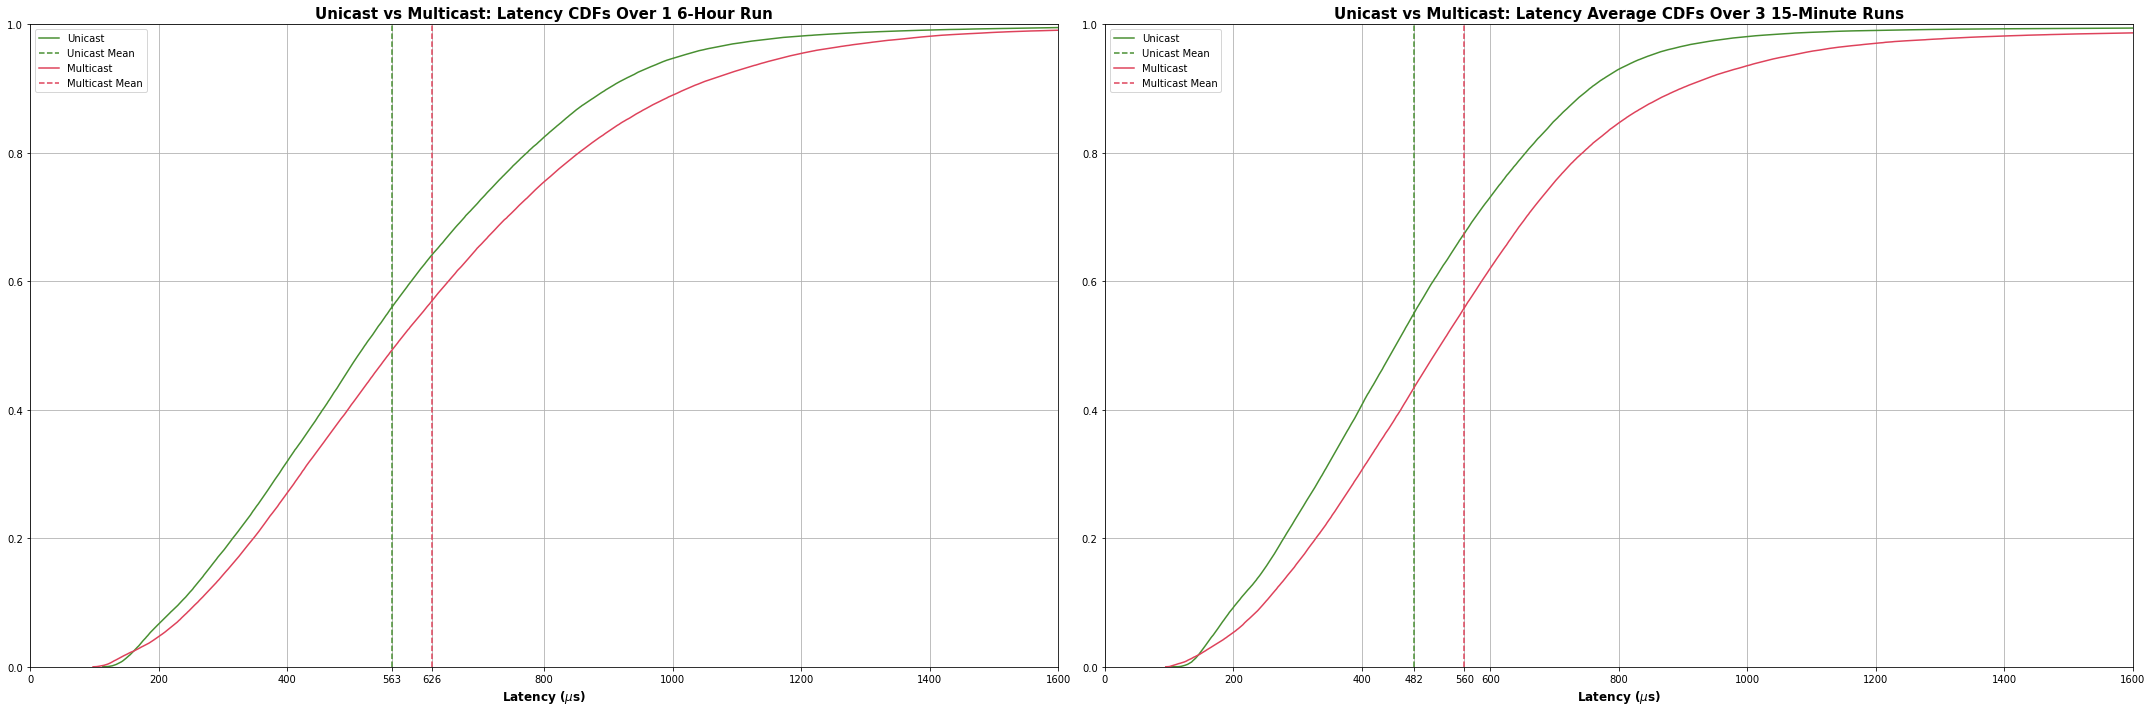

In [40]:
files = [file for file in get_files('data/v2/set_1') if 'average' in file]
raw_lat_files = [file for file in files if 'average_latencies' in file]
avg_lats = { 'unicast': raw_lat_files[0], 'multicast': raw_lat_files[1] }

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))

df = pd.read_csv(avg_lats['unicast'])
u_mean = df['run_1_latency'].mean()
plot_cdf('Unicast', df['run_1_latency'], axes[0], greens[0], 'latency')
axes[0].axvline(u_mean, 0, 1, ls="--", color=greens[0], label="Unicast Mean")

df = pd.read_csv(avg_lats['multicast'])
m_mean = df['run_1_latency'].mean()
plot_cdf('Multicast', df['run_1_latency'], axes[0], reds[0], 'latency')
axes[0].axvline(m_mean, 0, 1, ls="--", color=reds[0], label="Multicast Mean")

_ = axes[0].set_title("Unicast vs Multicast: Latency CDFs Over 1 6-Hour Run", fontsize=15, fontweight='bold')
_ = axes[0].legend()
axes[0].set_xlabel("Latency ($\mu$s)", fontsize=12, fontweight="bold")
axes[0].set_ylim(ymin=0, ymax=1)
axes[0].set_xlim(xmin=100, xmax=1500)
xticks_list = list(axes[0].get_xticks())
xticks_list.remove(600.0)
axes[0].set_xticks(xticks_list + [u_mean, m_mean, ])
axes[0].grid()

files = [file for file in get_files('data/v1/set_1') if 'average' in file and 'forced' in file]
raw_lat_files = [file for file in files if 'average_latencies' in file]
avg_lats = { 'unicast': raw_lat_files[0], 'multicast': raw_lat_files[1] }

df = pd.read_csv(avg_lats['unicast'])
combined_df = pd.concat([ df['run_1_latency'], df['run_2_latency'], df['run_3_latency'] ])
plot_cdf('Unicast', combined_df, axes[1], greens[0], 'normal')
unicast_mean = combined_df.mean()
axes[1].axvline(unicast_mean, 0, 1, ls="--", color=greens[0], label="Unicast Mean")

df = pd.read_csv(avg_lats['multicast'])
combined_df = pd.concat([ df['run_1_latency'], df['run_2_latency'], df['run_3_latency'] ])
plot_cdf('Multicast', combined_df, axes[1], reds[0], 'normal')
multicast_mean = combined_df.mean()
axes[1].axvline(multicast_mean, 0, 1, ls="--", color=reds[0], label="Multicast Mean")

_ = axes[1].set_title("Unicast vs Multicast: Latency Average CDFs Over 3 15-Minute Runs", fontsize=15, fontweight='bold')
_ = axes[1].legend()
axes[1].set_xlabel("Latency ($\mu$s)", fontsize=12, fontweight="bold")
axes[1].set_ylim(ymin=0, ymax=1)
axes[1].set_xlim(xmin=100, xmax=1500)
axes[1].set_xticks(list(axes[1].get_xticks()) + [unicast_mean, multicast_mean, ])
axes[1].grid()

plt.tight_layout()

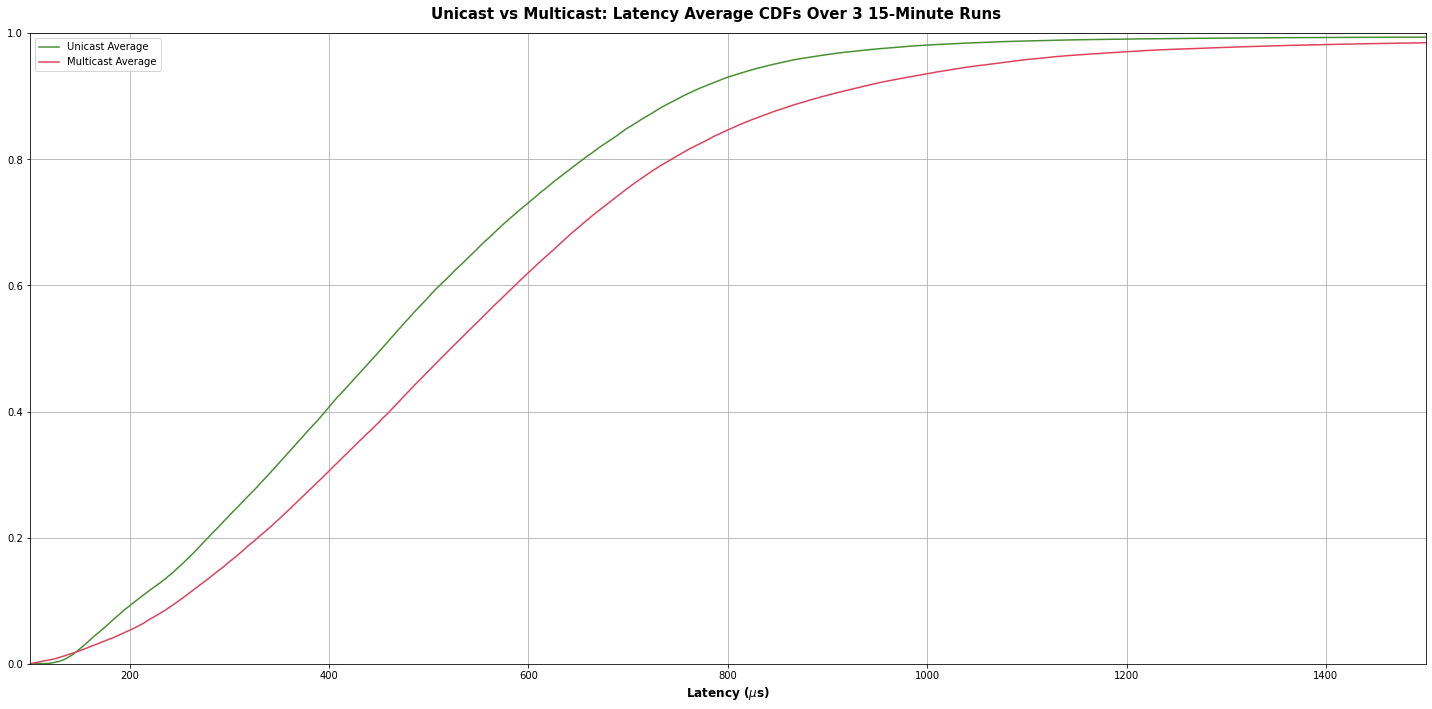

In [20]:
files = [file for file in get_files('data/v1/set_1') if 'average' in file and 'forced' in file]
raw_lat_files = [file for file in files if 'average_latencies' in file]
avg_lats = { 'unicast': raw_lat_files[0], 'multicast': raw_lat_files[1] }

fig, ax = plt.subplots(figsize=(20, 10))

df = pd.read_csv(avg_lats['unicast'])
combined_df = pd.concat([ df['run_1_latency'], df['run_2_latency'], df['run_3_latency'] ])
# plot_cdf('', df['run_1_latency'], ax, greens[0], 'latency')
# plot_cdf('', df['run_2_latency'], ax, greens[2], 'latency')
# plot_cdf('', df['run_3_latency'], ax, greens[4], 'latency')
plot_cdf('Unicast Average', combined_df, ax, greens[0], 'normal')
# ax.axvline(combined_df.mean(), 0, 1, ls="--", color=blues[0], label="Unicast Mean")
unicast_mean = combined_df.mean()

df = pd.read_csv(avg_lats['multicast'])
combined_df = pd.concat([ df['run_1_latency'], df['run_2_latency'], df['run_3_latency'] ])
# plot_cdf('', df['run_1_latency'], ax, reds[0], 'latency')
# plot_cdf('', df['run_2_latency'], ax, reds[2], 'latency')
# plot_cdf('', df['run_3_latency'], ax, reds[4], 'latency')
plot_cdf('Multicast Average', combined_df, ax, reds[0], 'normal')
# ax.axvline(combined_df.mean(), 0, 1, ls="--", color=oranges[0], label="Multicast Mean")

# ax.annotate("+" + format_number(get_percent_diff(combined_df.mean(), unicast_mean)) + "%", (unicast_mean, 0.1), (combined_df.mean() + 5, 0.1), arrowprops={"arrowstyle": "<-", "color": "black"}, fontweight='bold')

_ = ax.get_figure().suptitle("Unicast vs Multicast: Latency Average CDFs Over 3 15-Minute Runs", fontsize=15, fontweight='bold')
_ = ax.legend()
ax.set_xlabel("Latency ($\mu$s)", fontsize=12, fontweight="bold")
ax.set_ylim(ymin=0, ymax=1)
ax.set_xlim(xmin=100, xmax=1500)
# ax.set_xticks(list(ax.get_xticks()) + [unicast_mean, combined_df.mean(), ])
ax.grid()

plt.tight_layout()